## Incêndios Florestais no Brasil


In [60]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [61]:
# Lendo os dados
Base_Dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Case Incendios Florestais/Dados_Indendio.csv', encoding='latin-1')

# Verificando
Base_Dados.head() 

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [62]:
# Verificando campos nulos
Base_Dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

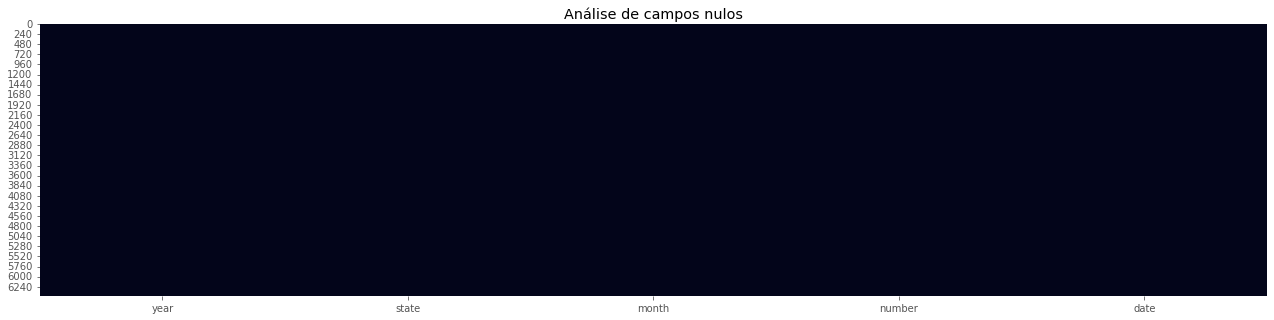

In [63]:
# Análise campos nulos
plt.figure(figsize=(22,5))
plt.title('Análise de campos nulos')
sns.heatmap(Base_Dados.isnull(), cbar=False)

In [64]:
# Verificando Estatisticas
Base_Dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [65]:
# Verificando as colunas
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [66]:
# Verificando quantos campos unico existe
Base_Dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

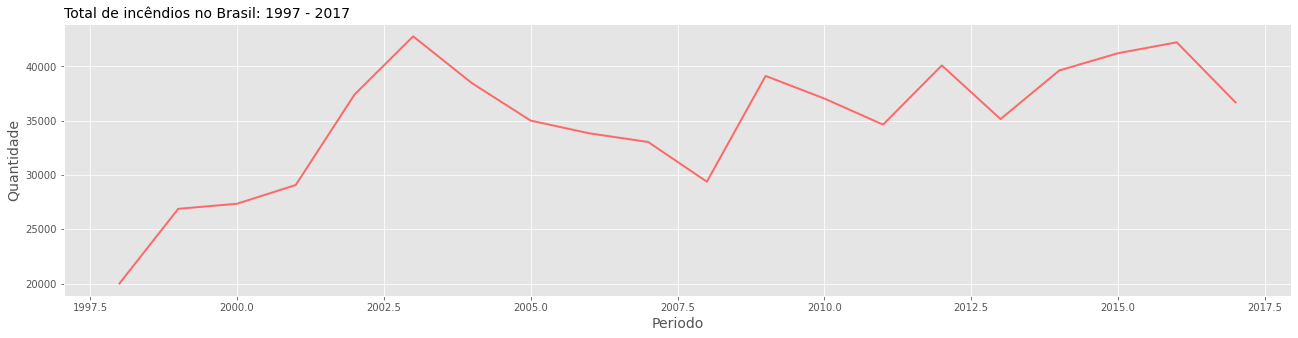

In [67]:
# Análise de incendios por ano
Analise = Base_Dados.groupby( by=['year']).sum().reset_index() # reset_index() cria uma nova coluna ID, retira a serie temporal

# Estilo de gráfico
plt.style.use('ggplot')

# Tamanho do gráfico
plt.figure(figsize=(22,5))

# Titulo do gráfico
plt.title('Total de incêndios no Brasil: 1997 - 2017', loc='left', fontsize=14)

# Plot do gráfico
sns.lineplot(data=Analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85)

# Label´s dos eixos x e y
plt.xlabel('Periodo', fontsize=14)
plt.ylabel('Quantidade', fontsize=14);

In [68]:
# Agrupando por ano e mês
Analise_02 = Base_Dados.groupby(by=['year', 'month']).sum().reset_index()

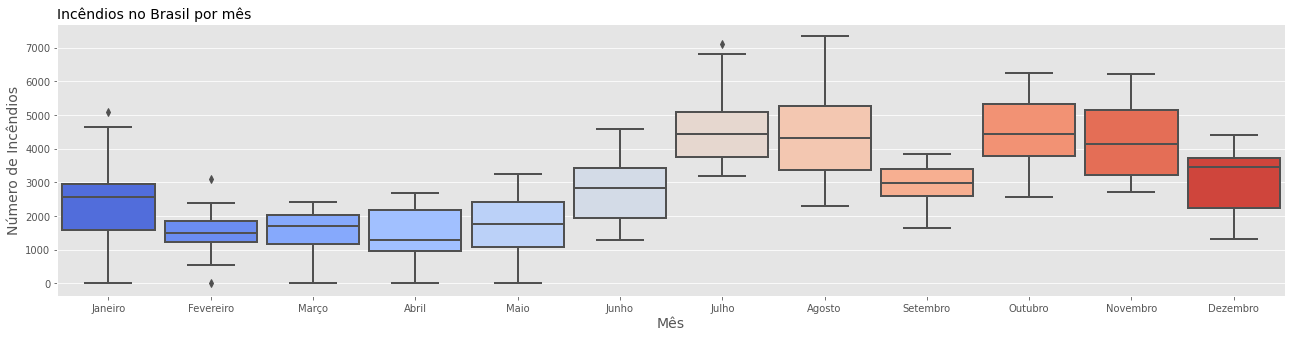

In [69]:
# Análise por mês

# Estilo de gráfico
plt.style.use('ggplot')

# Tamanho do gráfico
plt.figure(figsize=(22,5))

# Titulo do gráfico
plt.title('Incêndios no Brasil por mês', loc='left', fontsize=14)

# Plot do gráfico
sns.boxplot(data=Analise_02, x='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

# Label´s dos eixos x e y
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Número de Incêndios', fontsize=14);

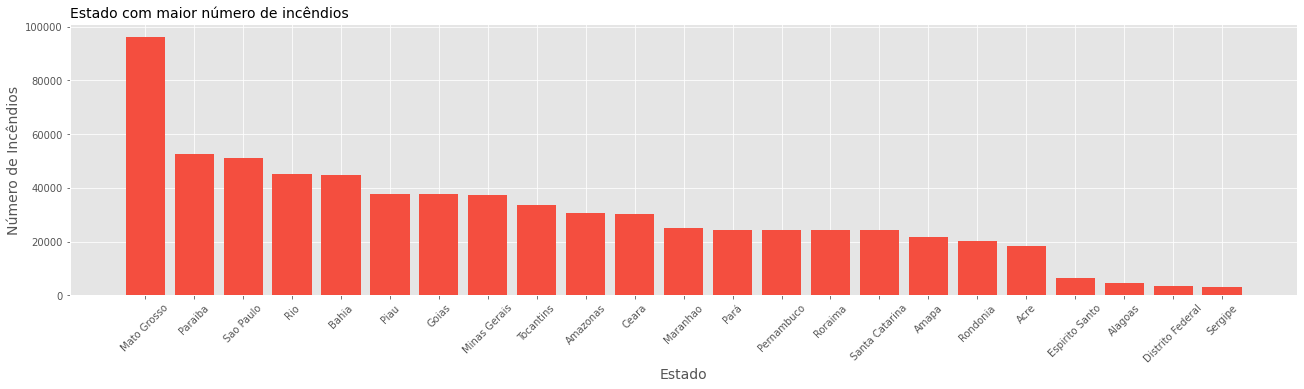

In [77]:
# Agrupando por ano, mês e estado
Analise_03 = Base_Dados.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending = False) # [['state', 'number']] - pegando somente o state e o number

# Estilo de gráfico
plt.style.use('ggplot')

# Tamanho do gráfico
plt.figure(figsize=(22,5))

# Titulo do gráfico
plt.title('Estado com maior número de incêndios', loc='left', fontsize=14)

# Plot gráfico
plt.bar(Analise_03['state'], Analise_03['number'], color='#f44e3f') # Pode ser utilizado Analise_03.number ou Analise_03['number']

# Label´s dos eixos x e y
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Número de Incêndios', fontsize=14)

# Rotação dos label´s do eixo x
plt.xticks(rotation=45 );

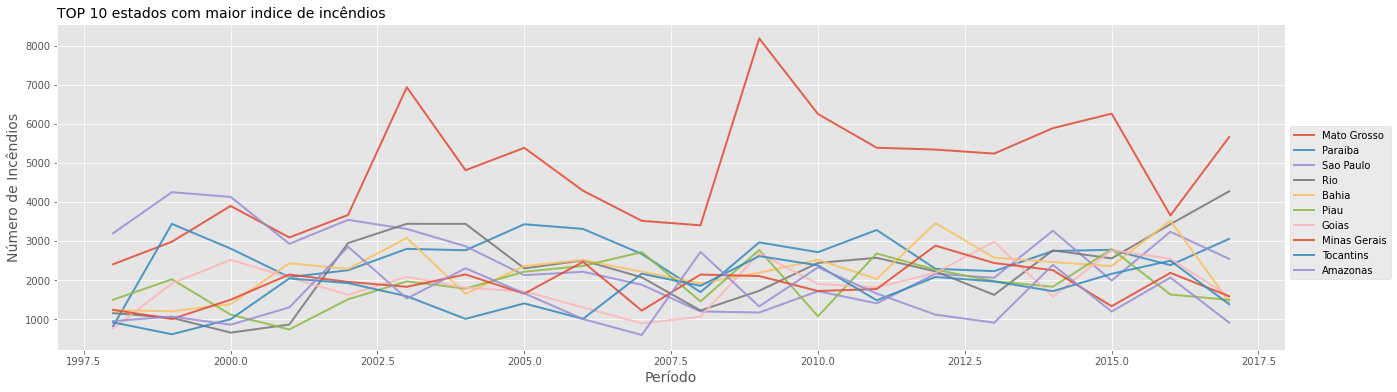

In [93]:
# Estados TOP 10 
# Analise_03['state'][0:10] pegando os 10 primeiros registros

# Cria a lista dos TOP 10
Lista_TOP10 = Analise_03['state'][0:10].values

#-------------------------------------------------------------------------
# Configuração do gráfico
# Estilo de gráfico
plt.style.use('ggplot')

# Tamanho do gráfico
plt.figure(figsize=(22,6))

# Titulo do gráfico
plt.title('TOP 10 estados com maior indice de incêndios', loc='left', fontsize=14)

#-------------------------------------------------------------------------
# Plot gráfico
for Coluna in Lista_TOP10:

  # Filtro dos estados TOP 10
  Filtro = Base_Dados.loc[ Base_Dados['state'] == Coluna]

  # Agruando os valores por ano
  Analise_Local = Filtro.groupby( by=['year'] ).sum().reset_index()

  # Plot gráfico
  sns.lineplot(data=Analise_Local, x='year', y='number', lw=2, alpha=0.85)

#-------------------------------------------------------------------------

# Label´s dos eixos x e y
plt.xlabel('Período', fontsize=14)
plt.ylabel('Número de Incêndios', fontsize=14)

# Legendas
plt.legend( Lista_TOP10, bbox_to_anchor=(1,0.7) );

In [94]:
# Gerando o mapa

# Plot Geográfico

# Gerando os estados
Estados = Analise_03.sort_values('state')['state'].values

# Gerando os valores
Valores = Analise_03.sort_values('state')['number'].values

# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# Organizados os dados
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}

# Lendo o dicionario
Analise_Geografica = pd.DataFrame ( Dicionario )

Analise_Geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [95]:
# Fazendo o plot do mapa do Brasil
import plotly.express as px

# Mapa de CAlor Geografico
px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)